In [ ]:
!pip install face_recognition
!pip install mtcnn
!pip install facenet_pytorch

## Библиотеки

In [1]:
import cv2
from skimage.feature import hog
import dlib
import face_recognition
from mtcnn import MTCNN
from skimage import exposure
import matplotlib.pyplot as plt
from PIL import Image
import torch

## HOG

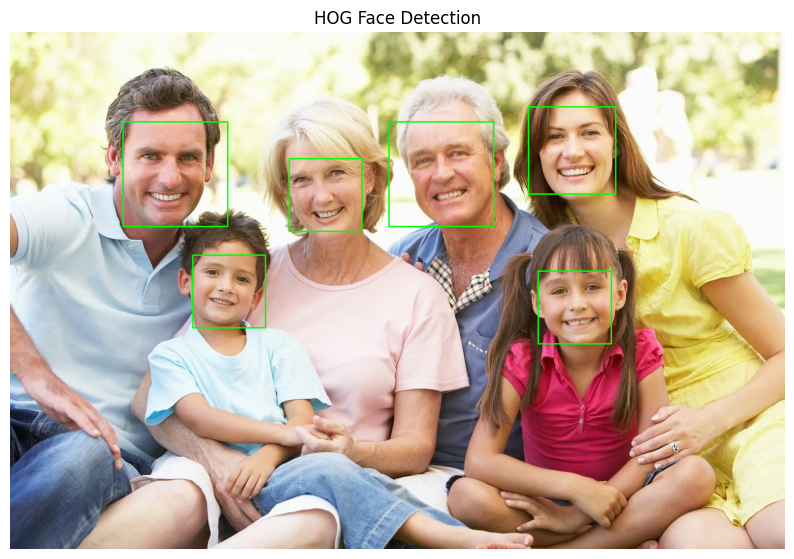

In [23]:
image_path = '/content/fam.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
faces = detector(gray)

for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))

plt.imshow(image_rgb)
plt.title('HOG Face Detection')

plt.axis('off')

plt.show()

## Face Landmarks

In [6]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2024-08-04 13:13:10--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  86.8MB/s    in 0.7s    

2024-08-04 13:13:11 (86.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [7]:
predictor_path = 'shape_predictor_68_face_landmarks.dat'

In [19]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

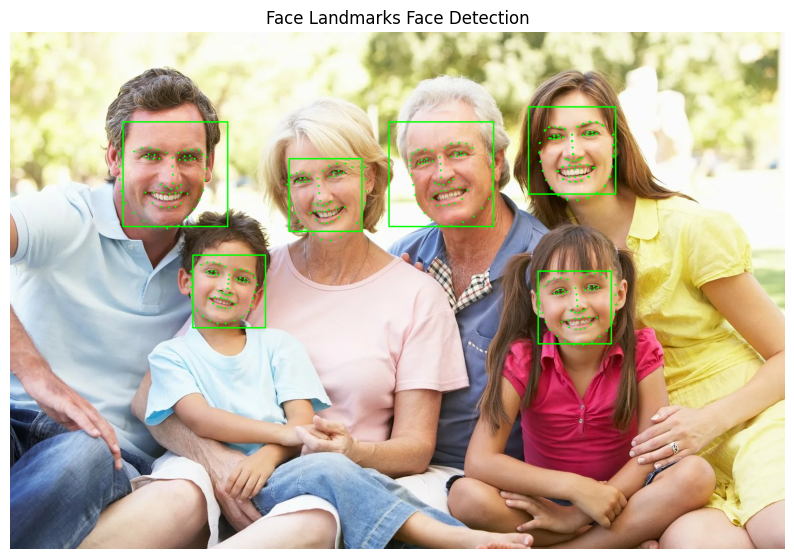

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = detector(gray)

for face in faces:
    landmarks = predictor(gray, face)

    # Отрисовка ключевых точек лица
    for i in range(60):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title('Face Landmarks Face Detection')
plt.axis('off')
plt.show()


## Embeddings

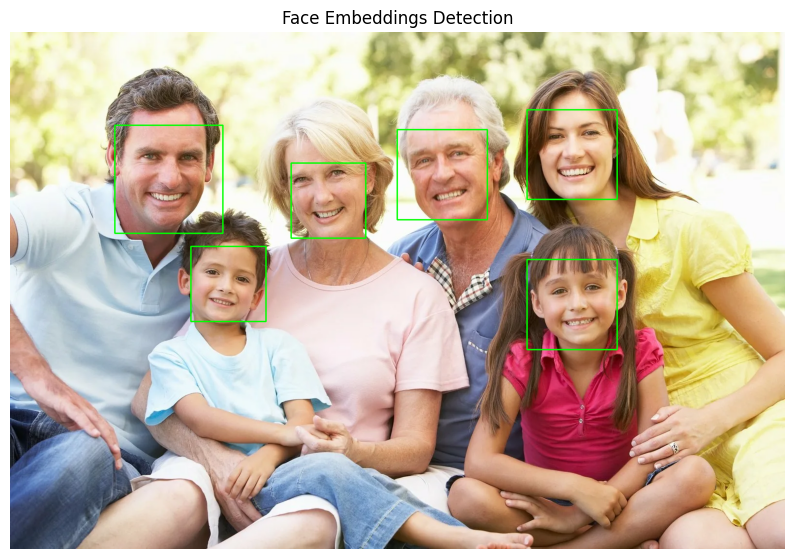

In [29]:
image_path = '/content/fam.jpg'

image = face_recognition.load_image_file(image_path)

face_locations = face_recognition.face_locations(image)

face_encodings = face_recognition.face_encodings(image, face_locations)

image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

for (top, right, bottom, left) in face_locations:
    cv2.rectangle(image_bgr, (left, top), (right, bottom), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title('Face Embeddings Detection')
plt.axis('off')
plt.show()


## MTCNN

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 694ms/step


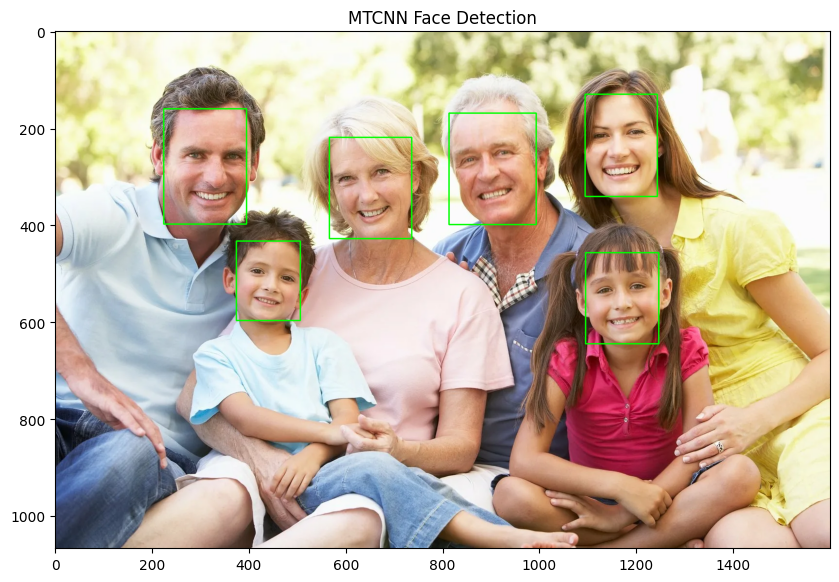

In [30]:
image_path = '/content/fam.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

detector = MTCNN()

faces = detector.detect_faces(image_rgb)

for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('MTCNN Face Detection')
plt.show()